In [1]:
# installations
 # assess the similarity ratio
%pip install fuzzywuzzy 
# increase the speed of sequence matcher
%pip install python-Levenshtein 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 3. Data preparation
 ## 3. 1: Python Libraries
 
 ### Before cleaning and doing analysis on the data, it is essential to import all necessary libraries.

In [2]:
# Data handling and manipulation
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")
import seaborn as sns 
sns.set_style('whitegrid') # Set the style to 'whitegrid'
import plotly.express as px

# statistical analysis 

from scipy import stats

from scipy.stats import pearsonr

#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# identify similar values
from fuzzywuzzy import fuzz, process

import warnings
warnings.filterwarnings('ignore')

## 3.2: Import Data

### This is an example of how the 2021 dataset was retrieved from the SQL Server database. The same process was used for the 2020 dataset, while 2018 and 2019 datasets were downloaded and imported.

In [3]:
data2021=pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Datasets\startup_funding2021.csv')
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4]:
# # Get the dimensions of the DataFrame
data2021.shape

(1209, 9)

In [5]:
# # Generate descriptive statistics
data2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [6]:
# Get the cardinality/number of unique values in each column
data2021.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [7]:
# Get the data types of each column
data2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [8]:
# Get the missing values of each column
data2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [9]:
# calculate the percentage of missing values in each column and sort them in descending order
data2021.isna().mean().sort_values(ascending=False)*100

Stage            35.401158
Investor          5.128205
Founders          0.330852
Amount            0.248139
Founded           0.082713
HeadQuarter       0.082713
Company_Brand     0.000000
Sector            0.000000
What_it_does      0.000000
dtype: float64

## 3.3 DATA CLEANING

### 3.3.1  Handle Inconsistencies

In [10]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### rename column names

In [11]:
# rename company/brand and Amount columns
data2021=data2021.rename(columns={'Company/Brand':'Company_Brand','Amount':'Amount($)'})
data2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

### check for consistency in each column

In [12]:
# count the occurrences of unique values in Company_brand column
data2021['Company_Brand'].value_counts()

BharatPe                           8
BYJU'S                             4
CoinSwitch Kuber                   3
Delhivery                          3
Slice                              3
Captain Fresh                      3
Northern Arc                       3
Jumbotail                          3
MPL                                3
Spinny                             3
KreditBee                          3
MediBuddy                          3
Teachmint                          3
Advantage Club                     3
DealShare                          3
Ruptok                             3
Zetwerk                            3
Ola Electric                       3
Siply                              3
Karbon Card                        3
OYO                                3
Bizongo                            3
Bewakoof                           3
GlobalBees                         2
Practically                        2
Fullife Healthcare                 2
Zepto                              2
M

In [13]:
# count the occurrences of unique values in Founded column
data2021['Founded'].value_counts()

2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
2013.0     22
2008.0     15
2010.0     14
2009.0      9
2007.0      6
2000.0      6
2006.0      3
2002.0      2
1994.0      2
1989.0      2
1999.0      2
1998.0      2
2004.0      2
1993.0      1
1978.0      1
2003.0      1
1991.0      1
1984.0      1
2005.0      1
1963.0      1
Name: Founded, dtype: int64

In [14]:
# remove the floats in founded year
# Replace non-finite values with median
data2021['Founded'] = data2021['Founded'].fillna(data2021['Founded'].median())

# Convert the 'Founded' column to an integer data type
data2021['Founded'] = data2021['Founded'].astype(int)

In [15]:
data2021['Founded'].value_counts()

2020    237
2019    177
2018    144
2015    129
2016    118
2017    112
2021     76
2014     57
2011     34
2012     31
2013     22
2008     15
2010     14
2009      9
2007      6
2000      6
2006      3
2002      2
1994      2
1989      2
1999      2
1998      2
2004      2
1993      1
1978      1
2003      1
1991      1
1984      1
2005      1
1963      1
Name: Founded, dtype: int64

In [16]:
# count the occurrences of unique values in Headquarter column
data2021['HeadQuarter'].value_counts()

Bangalore                            426
Mumbai                               203
Gurugram                             155
New Delhi                            144
Pune                                  47
Chennai                               40
Noida                                 34
Hyderabad                             34
Jaipur                                11
Ahmedabad                             11
Gurgaon                                7
Thane                                  7
Ahmadabad                              6
Kolkata                                5
Chandigarh                             5
Haryana                                4
Gujarat                                3
Lucknow                                3
Coimbatore                             3
Faridabad, Haryana                     2
Ghaziabad                              2
Food & Beverages                       2
Pharmaceuticals\t#REF!                 2
Computer Games                         2
Goa             

In [17]:
# a few entries do not appear to be cities. extract the first part of each value
# in the 'HeadQuarter' column before the comma
# Split values in 'HeadQuarter' column by comma
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.split(',').str[0]

In [18]:
data2021['HeadQuarter'].value_counts()

Bangalore                            426
Mumbai                               203
Gurugram                             155
New Delhi                            144
Pune                                  47
Chennai                               40
Noida                                 34
Hyderabad                             34
Jaipur                                11
Ahmedabad                             11
Thane                                  7
Gurgaon                                7
Ahmadabad                              6
Chandigarh                             5
Kolkata                                5
Haryana                                4
Coimbatore                             3
Faridabad                              3
Gujarat                                3
Lucknow                                3
Pharmaceuticals\t#REF!                 2
Ghaziabad                              2
Indore                                 2
Surat                                  2
Food & Beverages

In [19]:
# Replace non headquarter values with NaN in a column
data2021['HeadQuarter'] = data2021['HeadQuarter'].replace(['Pharmaceuticals\t#REF!', 'Food & Beverages', 'Computer Games','Online Media\t#REF!','Information Technology & Services'], np.nan)


In [20]:
data2021['HeadQuarter'].value_counts()

Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
Chennai                40
Hyderabad              34
Noida                  34
Jaipur                 11
Ahmedabad              11
Gurgaon                 7
Thane                   7
Ahmadabad               6
Chandigarh              5
Kolkata                 5
Haryana                 4
Gujarat                 3
Lucknow                 3
Faridabad               3
Coimbatore              3
Cochin                  2
Ghaziabad               2
Indore                  2
Goa                     2
Surat                   2
Satara                  1
Panaji                  1
Beijing                 1
Orissia                 1
Kottayam                1
Jodhpur                 1
New York                1
Trivandrum              1
The Nilgiris            1
Santra                  1
Mountain View           1
Jharkhand               1
Kanpur                  1
Telugana    

In [21]:
# remove special characters
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.replace('[\,#,!,]','')

In [22]:
data2021['HeadQuarter'].value_counts()

Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
Chennai                40
Hyderabad              34
Noida                  34
Jaipur                 11
Ahmedabad              11
Gurgaon                 7
Thane                   7
Ahmadabad               6
Chandigarh              5
Kolkata                 5
Haryana                 4
Gujarat                 3
Lucknow                 3
Faridabad               3
Coimbatore              3
Cochin                  2
Ghaziabad               2
Indore                  2
Goa                     2
Surat                   2
Satara                  1
Panaji                  1
Beijing                 1
Orissia                 1
Kottayam                1
Jodhpur                 1
New York                1
Trivandrum              1
The Nilgiris            1
Santra                  1
Mountain View           1
Jharkhand               1
Kanpur                  1
Telugana    

In [23]:
# count the occurrences of unique values in Sector column
data2021['Sector'].value_counts().sort_values(ascending=False)

FinTech                                                                                                                                       122
EdTech                                                                                                                                        102
Financial Services                                                                                                                             61
E-commerce                                                                                                                                     37
Food & Beverages                                                                                                                               37
Information Technology & Services                                                                                                              36
Automotive                                                                                                                  

In [24]:
# there are inconsistencies in the sector column
# create a function to merge values based on name similarity to improve consistency
def merge_values_by_name_similarity(df, column_name, pattern, consistent_name):
    df.loc[df[column_name].str.contains(pattern, case=False), column_name] = consistent_name
    return df

# Define the patterns and consistent names
patterns = ['care', 'Information', 'food']
consistent_names = ['Healthcare', 'Information Technology & Services', 'Food & Beverages']

# Apply the function for each pattern and consistent name
for pattern, consistent_name in zip(patterns, consistent_names):
    data2021 = merge_values_by_name_similarity(data2021, 'Sector', pattern, consistent_name)

# Display the updated column
print(data2021['Sector'].value_counts())


FinTech                                                                                                                    122
EdTech                                                                                                                     102
Healthcare                                                                                                                  81
Financial Services                                                                                                          61
Information Technology & Services                                                                                           47
Food & Beverages                                                                                                            45
E-commerce                                                                                                                  37
Automotive                                                                                                     

In [25]:
# Check for other similar names with a similarity ratio of at least 80 and replace with a consistent name
# Define the threshold similarity ratio
threshold = 80

# Iterate over each name in the sector column
for i, name in enumerate(data2021['Sector']):
    # Compare the current name with all the other names in the column
    matches = process.extractBests(name, data2021['Sector'], scorer=fuzz.ratio, score_cutoff=threshold)
    
    # Check if there are any similar names
    if len(matches) > 1:
        # Replace the similar names with a consistent name (the first name in the list)
        data2021.loc[i, 'Sector'] = matches[0][0]

# Display the updated sector column
print(data2021['Sector'].value_counts())


FinTech                                                                                                                    122
EdTech                                                                                                                     102
Healthcare                                                                                                                  81
Financial Services                                                                                                          61
Information Technology & Services                                                                                           47
Food & Beverages                                                                                                            45
E-commerce                                                                                                                  37
Automotive                                                                                                     

In [26]:
# count the occurrences of unique values in Amount column
data2021['Amount($)'].value_counts().sort_values(ascending=False)

$Undisclosed                       73
$1000000                           52
Undisclosed                        43
$2000000                           40
$1,000,000                         33
$3000000                           31
$5000000                           29
$10000000                          28
$500000                            25
$undisclosed                       22
$200000                            20
$2,000,000                         20
$4000000                           20
$400000                            18
$3,000,000                         17
$300000                            17
$200,000                           17
$10,000,000                        15
$20000000                          15
$30000000                          13
$6000000                           13
$7000000                           13
$1200000                           12
$700000                            12
$5,000,000                         12
$15,000,000                        11
$100000000  

In [27]:
# there are inconsistencies in the amount column
# remove special characters($ sign)
data2021['Amount($)'] = data2021['Amount($)'].str.replace('[$,,]','', regex=True)
# remove any non-digit characters from the 'Amount($)' column
data2021['Amount($)'] = data2021['Amount($)'].str.replace(r'\D+','', regex=True)
# convert empty space to nan
data2021['Amount($)'] = data2021['Amount($)'].replace('',np.nan)
# convert column to numeric
data2021["Amount($)"] = pd.to_numeric(data2021["Amount($)"], errors='coerce')
data2021['Amount($)'].value_counts()

1.000000e+06    85
2.000000e+06    60
3.000000e+06    48
1.000000e+07    43
5.000000e+06    41
2.000000e+05    37
5.000000e+05    36
4.000000e+06    30
3.000000e+05    27
4.000000e+05    24
6.000000e+06    23
3.000000e+07    21
1.500000e+06    20
2.000000e+07    20
1.500000e+07    17
7.000000e+06    16
7.000000e+05    15
5.000000e+07    15
1.000000e+08    15
6.000000e+05    14
4.000000e+07    14
1.000000e+05    14
1.200000e+06    13
1.200000e+07    11
8.000000e+06    11
8.000000e+05    10
2.500000e+06    10
3.500000e+06     9
1.800000e+06     8
1.500000e+05     8
1.300000e+06     8
7.500000e+07     8
1.100000e+07     7
5.500000e+06     7
2.000000e+08     7
2.500000e+07     7
9.000000e+06     6
1.500000e+08     6
4.500000e+06     6
1.700000e+06     6
2.400000e+07     6
1.600000e+06     6
1.300000e+07     6
1.100000e+06     6
7.000000e+07     5
6.000000e+07     5
2.200000e+06     5
3.500000e+07     5
3.800000e+06     4
2.300000e+06     4
1.700000e+07     4
4.500000e+07     4
1.250000e+08

In [28]:
# count the occurrences of unique values in Stage column
data2021['Stage'].value_counts().sort_values(ascending=False)

Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
$1200000           2
Bridge             2
Series G           2
Series H           2
$300000            2
Pre-series         2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: Stage, dtype: int64

In [29]:
# the stage has inconsistencies
# remove special characters($ sign)
data2021['Stage'] = data2021['Stage'].str.replace('$','', regex=True)
# remove any digit characters from the 'Stage' column
data2021['Stage'] = data2021['Stage'].str.replace(r'\d+','', regex=True)
# replace empty spaces with np.nan
data2021['Stage'] = data2021['Stage'].replace('', np.nan)
# replace nan with 'unknown'
data2021['Stage'] = data2021['Stage'].replace(np.nan, 'Unknown')

data2021['Stage'].value_counts()

Unknown         434
Seed            246
Pre-series A    161
Series A        127
Series B         50
Pre-seed         47
Series C         45
Debt             27
Series D         22
Series E         18
Pre-series B     10
Series F          8
Series G          2
Pre-series        2
Series H          2
Bridge            2
Series A+         1
PE                1
Early seed        1
Seies A           1
Seed+             1
Series I          1
Name: Stage, dtype: int64

In [30]:
# count the occurrences of unique values in Founders column
data2021['Founders'].value_counts().sort_values(ascending=False)

Ashneer Grover, Shashvat Nakrani                                                                                                 7
Byju Raveendran, Divya Gokulnath                                                                                                 5
Bhavish Aggarwal                                                                                                                 4
Ritesh Agarwal                                                                                                                   4
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari                                                                                  3
Ankur Gupta                                                                                                                      3
Prabhkiran Singh                                                                                                                 3
Utham Gowda                                                                        

In [31]:
missing_rows=data2021[data2021['Founders'].isnull()]
missing_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
274,ByteLearn,2021,Noida,E-learning,AI powered teaching assistant for 100 Mn teach...,NaN,"Aditya Singhal, Nishant Sinha",9500000.0,Seed
558,The Sleep Company,2019,Mumbai,Consumer Goods,Patent Pending sleep technology developed by a...,NaN,Fireside Ventures,1000000.0,Pre-series A
1095,PredictiVu,2020,Gurugram,Management Consulting,PredictiVu's AI-enabled dashboard integrated w...,NaN,Kunal Sarkar,1500000.0,Pre-seed
1187,NeuroPixel.AI,2020,Bangalore,Deeptech,NeuroPixel.AI Labs is a deep tech start-up tha...,NaN,"Arvind Venugopal Nair, Amritendu Mukherjee",800000.0,Seed


In [32]:
# count the occurrences of unique values in Investor column
data2021['Investor'].value_counts().sort_values(ascending=False)

Inflection Point Ventures                                                                         24
Venture Catalysts                                                                                 11
Tiger Global                                                                                      11
Elevation Capital                                                                                  7
Titan Capital                                                                                      6
We Founder Circle                                                                                  6
Anicut Angel Fund                                                                                  5
Sequoia Capital India                                                                              5
Kalaari Capital                                                                                    5
Sixth Sense Ventures                                                                       

## 3.3.2 Imputing Missing values

In [33]:
# check missing values
data2021.isna().sum()

Company_Brand      0
Founded            0
HeadQuarter        9
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)        153
Stage              0
dtype: int64

In [34]:
data2021.dtypes

Company_Brand     object
Founded            int32
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [35]:
#select object variables
obj=data2021.select_dtypes(include='object')
obj.columns


Index(['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders',
       'Investor', 'Stage'],
      dtype='object')

In [36]:
obj= ['Founders','HeadQuarter','Investor']

In [37]:
# use mode to impute missing value in object columns
data2021[obj]=data2021[obj].fillna(data2021[obj].mode().iloc[0])

In [38]:
# select num columns
num=data2021.select_dtypes(exclude='object')
num.columns

Index(['Founded', 'Amount($)'], dtype='object')

In [39]:
num=['Amount($)']

In [40]:
# use median to impute numerical columns ignoring the Nan values to calculate the median
data2021[num]=data2021[num].fillna(data2021[num].median(skipna=True))

In [41]:
data2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [42]:
data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1.200000e+06,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",1.200000e+08,Unknown
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",3.000000e+07,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",5.100000e+07,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2.000000e+06,Seed
5,Urban Company,2014,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,1.880000e+08,Unknown
6,Comofi Medtech,2018,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",2.000000e+05,Unknown
7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,3.500000e+06,Pre-series A
8,Vitra.ai,2020,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,3.500000e+06,Unknown
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",Inflection Point Ventures,1.000000e+06,Unknown


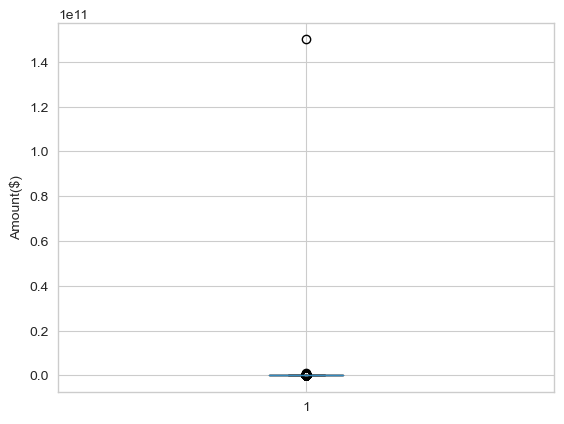

In [43]:
# 3.3.3 Checking for outliers in the amount column
# Create a box plot
plt.boxplot(data2021['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

In [45]:
# checking for duplicates
data2021.duplicated().sum()

19

In [46]:
# lets have a look at rows with duplicates
data2021.loc[data2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Unknown
111,FanPlay,2020,Bangalore,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",3500000.0,Unknown
117,Advantage Club,2014,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Unknown
119,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,Unknown
243,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A
244,Zorro,2021,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed
245,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C
246,NephroPlus,2009,Hyderabad,Healthcare,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series E
247,Unremot,2020,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed


In [47]:
# checking an example of a duplicate
data2021.query('Company_Brand =="Curefoods"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown


In [48]:
# checking another example of a duplicate
data2021.query('Company_Brand =="Fullife Healthcare"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,Bangalore,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown
256,Fullife Healthcare,2009,Bangalore,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown


In [49]:
# rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2021=data2021.loc[~data2021.duplicated(subset=['Company_Brand','Founded','Founders','Investor','Amount($)'])].reset_index(drop=True).copy()

In [50]:
# unique rows and columns
data2021.shape

(1180, 9)

In [51]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP1/India-startup-ecosytem-analysis/Datasets/clean_data2021.csv"

In [52]:
# Save the data as a CSV file
data2021.to_csv(file_path,  index=False)